In [25]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os 
import cv2 
import sklearn 
import keras
import tensorflow as tf


In [26]:
import pathlib 
pneumonia_dir = pathlib.Path("chest_xray/chest_xray/PNEUMONIA")
normal_dir = pathlib.Path("chest_xray/chest_xray/NORMAL")

In [27]:
dirlist=[pneumonia_dir,normal_dir ]
classes=['No', 'yes']
filepaths=[]
labels=[]
for i,j in zip(dirlist, classes):
    filelist=os.listdir(i)
    for f in filelist:
        filepath=os.path.join (i,f)
        filepaths.append(filepath)
        labels.append(j)
print ('filepaths: ', len(filepaths), '   labels: ', len(labels)) 

filepaths:  5856    labels:  5856


In [28]:
Files=pd.Series(filepaths, name='filepaths')
Label=pd.Series(labels, name='labels')
df=pd.concat([Files,Label], axis=1)
df=pd.DataFrame(np.array(df).reshape(5856,2), columns = ['filepaths', 'labels'])
df.head()

,filepaths,labels
0,chest_xray\chest_xray\PNEUMONIA\person1000_bac...,No
1,chest_xray\chest_xray\PNEUMONIA\person1000_vir...,No
2,chest_xray\chest_xray\PNEUMONIA\person1001_bac...,No
3,chest_xray\chest_xray\PNEUMONIA\person1002_bac...,No
4,chest_xray\chest_xray\PNEUMONIA\person1003_bac...,No


In [29]:
print(df['labels'].value_counts())

labels
No     4273
yes    1583
Name: count, dtype: int64


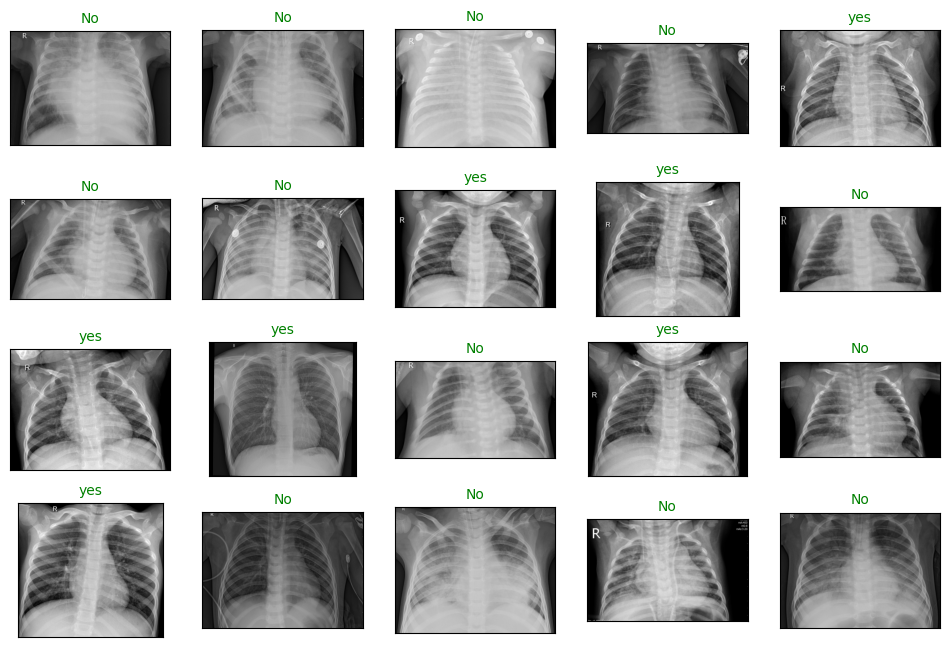

In [30]:
plt.figure(figsize=(12,8))
for i in range(20):
    random = np.random.randint(1,len(df))
    plt.subplot(4,5,i+1)
    plt.imshow(cv2.imread(df.loc[random,"filepaths"]))
    plt.title(df.loc[random, "labels"], size = 10, color = "green") 
    plt.xticks([])
    plt.yticks([])
    
plt.show()

In [31]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [32]:
import glob
images_dict = {
    'pnuemonia': list(pneumonia_dir.glob('*')) ,   
    'normal': list(normal_dir.glob('*'))  
}

labels_dict = {
    'pnuemonia': "pnuemonia",
    'normal': "normal",
    
}

In [33]:
import tensorflow as tf

In [34]:
# import cv2
# import matplotlib.pyplot as plt

# img = cv2.imread(str(images_dict['normal'][0]))
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for correct display

# plt.imshow(img)
# plt.title('Image')
# plt.show()


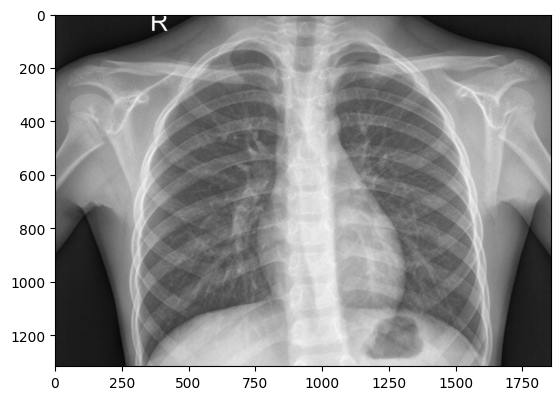

In [35]:
import PIL.Image as Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img = cv2.imread(str(images_dict['normal'][0]))
plt.imshow(img)

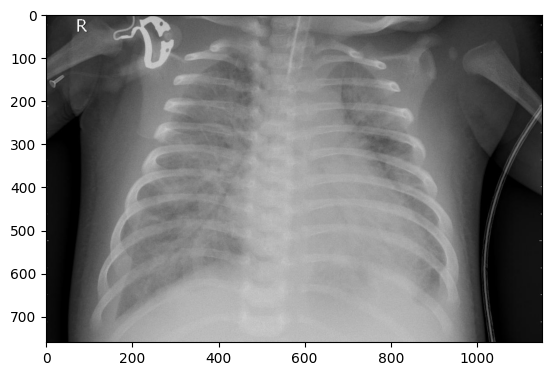

In [36]:
img2 = cv2.imread(str(images_dict['pnuemonia'][0]))
plt.imshow(img2)

In [37]:
X, y = [], []
for name,images in images_dict.items():#returns key , path for each record
    for image in images:
        img=str(image)
     
        #resize_img=cv2.resize(img)
       
        X.append(img)
        y.append(labels_dict[name])

In [38]:
Fseries = pd.Series(X, name="filepaths",dtype=str)
Lseries = pd.Series(y, name="labels",dtype=str)
pneumonia_data = pd.concat([Fseries,Lseries], axis=1)
pneumonia_df = pd.DataFrame(pneumonia_data)

print(pneumonia_df.head())
print("---------------------")
print(pneumonia_df["labels"].value_counts())

                                           filepaths     labels
0  chest_xray\chest_xray\PNEUMONIA\person1000_bac...  pnuemonia
1  chest_xray\chest_xray\PNEUMONIA\person1000_vir...  pnuemonia
2  chest_xray\chest_xray\PNEUMONIA\person1001_bac...  pnuemonia
3  chest_xray\chest_xray\PNEUMONIA\person1002_bac...  pnuemonia
4  chest_xray\chest_xray\PNEUMONIA\person1003_bac...  pnuemonia
---------------------
labels
pnuemonia    4273
normal       1583
Name: count, dtype: int64


In [39]:
pneumonia_df.shape

(5856, 2)

In [40]:
#splitting data
from sklearn.model_selection import train_test_split
train_images, test_images = train_test_split(pneumonia_df, test_size=0.3, random_state=42)
train_set, val_set = train_test_split(pneumonia_df, test_size=0.2, random_state=42)

In [41]:
#shape of splitted data
print(train_images.shape) 
print(test_images.shape)
print(train_set.shape)
print(val_set.shape)

(4099, 2)
(1757, 2)
(4684, 2)
(1172, 2)


In [42]:
#Generate batches of tensor image data with real-time data augmentation.
image_gen = ImageDataGenerator(preprocessing_function= tf.keras.applications.mobilenet_v2.preprocess_input)
train = image_gen.flow_from_dataframe(dataframe= train_images,x_col="filepaths",y_col="labels",
                                      target_size=(244,244),
                                      color_mode='rgb',
                                      class_mode="categorical", #used for Sequential Model
                                      batch_size=32,
                                      shuffle=False            #do not shuffle data
                                     )
test = image_gen.flow_from_dataframe(dataframe= test_images,x_col="filepaths", y_col="labels",
                                     target_size=(244,244),
                                     color_mode='rgb',
                                     class_mode="categorical",
                                     batch_size=32,
                                     shuffle= False
                                    )
val = image_gen.flow_from_dataframe(dataframe= val_set,x_col="filepaths", y_col="labels",
                                    target_size=(244,244),
                                    color_mode= 'rgb',
                                    class_mode="categorical",
                                    batch_size=32,
                                    shuffle=False
                                   )

Found 4099 validated image filenames belonging to 2 classes.
Found 1757 validated image filenames belonging to 2 classes.
Found 1172 validated image filenames belonging to 2 classes.


In [43]:
classes=list(train.class_indices.keys())
print (classes)

['normal', 'pnuemonia']


In [44]:
#Defining Sequential Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers,losses
cnn= Sequential([
                        #cnn layer 
                        layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same',input_shape=(244,244,3)),
                        layers.MaxPool2D(pool_size=(2,2)),

                        layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'),
                        layers.MaxPool2D(pool_size=(2,2)),

                        layers.Flatten(),
                        layers.Dense(128, activation='relu'),
                        layers.Dropout(rate=0.3),
                        layers.Dense(64, activation="relu"),
                        layers.Dense(2, activation="sigmoid")

])

c:\pneumonia disease prediction\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [46]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 244, 244, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 122, 122, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 122, 122, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 61, 61, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 119072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    15,241,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,259,874 (58.21 MB)

 Trainable params: 15,259,874 (58.21 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
History = cnn.fit(train, validation_data= val, epochs=11,verbose=1)

Epoch 1/11


c:\pneumonia disease prediction\venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


129/129 ━━━━━━━━━━━━━━━━━━━━ 420s 3s/step - accuracy: 0.7748 - loss: 0.6992 - val_accuracy: 0.9497 - val_loss: 0.1221
Epoch 2/11
129/129 ━━━━━━━━━━━━━━━━━━━━ 288s 2s/step - accuracy: 0.9455 - loss: 0.1590 - val_accuracy: 0.9590 - val_loss: 0.1088
Epoch 3/11
129/129 ━━━━━━━━━━━━━━━━━━━━ 250s 2s/step - accuracy: 0.9616 - loss: 0.1002 - val_accuracy: 0.9650 - val_loss: 0.1030
Epoch 4/11
129/129 ━━━━━━━━━━━━━━━━━━━━ 229s 2s/step - accuracy: 0.9790 - loss: 0.0677 - val_accuracy: 0.9633 - val_loss: 0.1104
Epoch 5/11
129/129 ━━━━━━━━━━━━━━━━━━━━ 274s 2s/step - accuracy: 0.9793 - loss: 0.0588 - val_accuracy: 0.9667 - val_loss: 0.1114
Epoch 6/11
129/129 ━━━━━━━━━━━━━━━━━━━━ 258s 2s/step - accuracy: 0.9870 - loss: 0.0361 - val_accuracy: 0.9659 - val_loss: 0.1182
Epoch 7/11
129/129 ━━━━━━━━━━━━━━━━━━━━ 259s 2s/step - accuracy: 0.9894 - loss: 0.0256 - val_accuracy: 0.9582 - val_loss: 0.1597
Epoch 8/11
129/129 ━━━━━━━━━━━━━━━━━━━━ 281s 2s/step - accuracy: 0.9909 - loss: 0.0255 - val_accuracy: 0.962

In [48]:
cnn.evaluate(test)

c:\pneumonia disease prediction\venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


55/55 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.9654 - loss: 0.1863


[0.21104562282562256, 0.9647125601768494]